In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
import os

from pythtb import W90, TBModel
import pythtb
import logging

pythtb.configure_logging(level="DEBUG")

<StreamHandler stderr (NOTSET)>

In [2]:
E_F = 7.5901 # eV

## PythTB `W90`

In [3]:
mode_0_dir = "base"
mode_1_dir = "mode_1"
mode_2_dir = "mode_2"
mode_3_dir = "mode_3"
mode_4_dir = "mode_4"

In [4]:
MBT_m0 = W90(mode_0_dir, r"MnBi2Te4")
# MBT_m1 = W90(mode_1_dir, r"MnBi2Te4")
MBT_m2 = W90(mode_2_dir, r"MnBi2Te4")
MBT_m3 = W90(mode_3_dir, r"MnBi2Te4")
MBT_m4 = W90(mode_4_dir, r"MnBi2Te4")

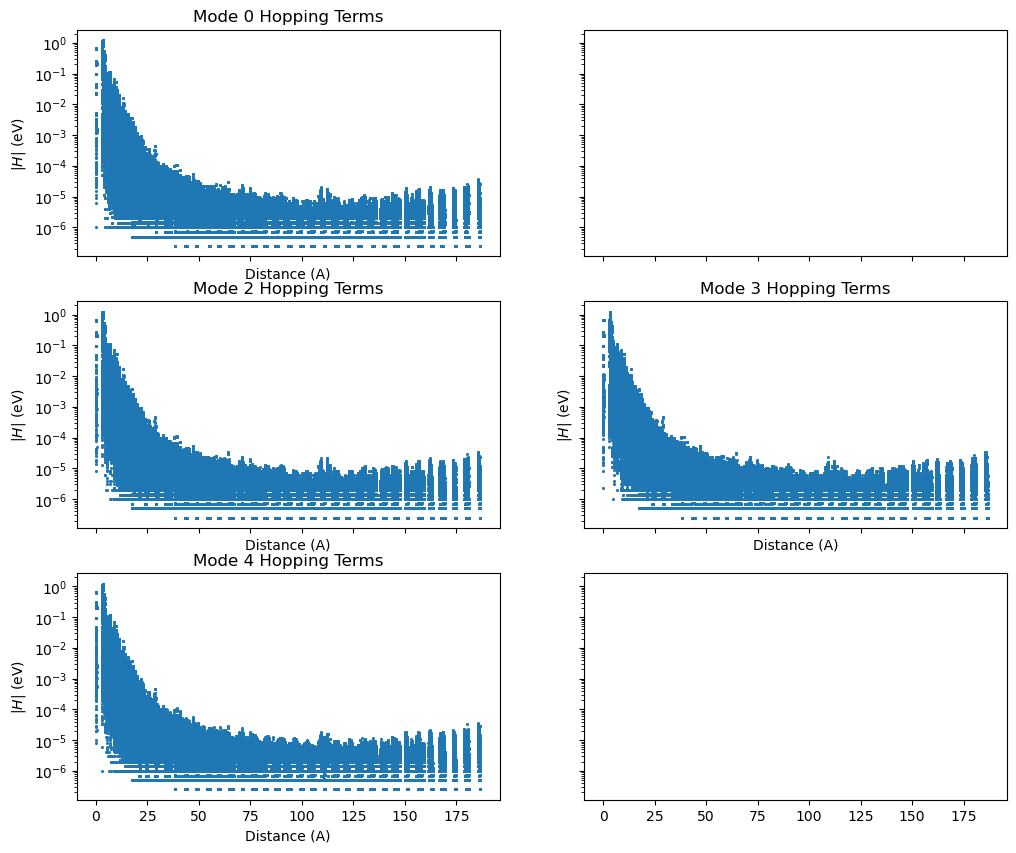

In [5]:
# plot hopping terms as a function of distance on a log scale
fix, ax = plt.subplots(3, 2, figsize=(12,10), sharex=True, sharey=True)

for i, ax in enumerate(ax.flatten()):
    if i == 0:
        (dist, ham) = MBT_m0.dist_hop()
    # elif i == 1:
    #     (dist, ham) = MBT_m1.dist_hop()
    elif i == 2:
        (dist, ham) = MBT_m2.dist_hop()
    elif i == 3:
        (dist, ham) = MBT_m3.dist_hop()
    elif i == 4:
        (dist, ham) = MBT_m4.dist_hop()
    else:
        continue

    ax.scatter(dist, np.abs(ham), s=1)
    ax.set_xlabel("Distance (A)")
    ax.set_ylabel(r"|$H$| (eV)")
    ax.set_yscale('log')
    ax.set_title(f"Mode {i} Hopping Terms")

# Wannier90 bands

In [6]:
k_frac_w90_m0, w90_evals_m0, k_dist_w90_m0, k_nodes_w90_m0, k_labels_w90_m0 = MBT_m0.bands_w90(return_k_dist=True, return_k_nodes=True)
k_frac_w90_m2, w90_evals_m2, k_dist_w90_m2, k_nodes_w90_m2, k_labels_w90_m2 = MBT_m2.bands_w90(return_k_dist=True, return_k_nodes=True)
k_frac_w90_m3, w90_evals_m3, k_dist_w90_m3, k_nodes_w90_m3, k_labels_w90_m3 = MBT_m3.bands_w90(return_k_dist=True, return_k_nodes=True)
k_frac_w90_m4, w90_evals_m4, k_dist_w90_m4, k_nodes_w90_m4, k_labels_w90_m4 = MBT_m4.bands_w90(return_k_dist=True, return_k_nodes=True)

In [7]:
w90_evals_m0_shift = w90_evals_m0 - E_F
w90_evals_m2_shift = w90_evals_m2 - E_F
w90_evals_m3_shift = w90_evals_m3 - E_F
w90_evals_m4_shift = w90_evals_m4 - E_F

## PythTB bands

In [8]:
# get tb model in which some small terms are ignored

model_m0 = MBT_m0.model(
    zero_energy=E_F, min_hopping_norm=1e-5,
    max_distance=None, ignorable_imaginary_part=None
    )

model_m2 = MBT_m2.model(
    zero_energy=E_F, min_hopping_norm=1e-5,
    max_distance=None, ignorable_imaginary_part=None
    )

model_m3 = MBT_m3.model(
    zero_energy=E_F, min_hopping_norm=1e-5,
    max_distance=None, ignorable_imaginary_part=None
    )

model_m4 = MBT_m4.model(
    zero_energy=E_F, min_hopping_norm=1e-5,
    max_distance=None, ignorable_imaginary_part=None
    )

In [9]:
k_vec, k_dist, k_node_dist = model_m2.k_path(k_nodes_w90_m0, nk=400, report=False)

In [10]:
pythtb_evals_m0 = model_m0.solve_ham(k_vec, use_tensorflow=True)
pythtb_evals_m2 = model_m2.solve_ham(k_vec, use_tensorflow=True)
pythtb_evals_m3 = model_m3.solve_ham(k_vec, use_tensorflow=True)
pythtb_evals_m4 = model_m4.solve_ham(k_vec, use_tensorflow=True)

DEBUG pythtb.tbmodel: Initializing Hamiltonian...
DEBUG pythtb.tbmodel: Diagonalizing Hamiltonian...
DEBUG pythtb.tbmodel: Initializing Hamiltonian...
DEBUG pythtb.tbmodel: Diagonalizing Hamiltonian...
DEBUG pythtb.tbmodel: Initializing Hamiltonian...
DEBUG pythtb.tbmodel: Diagonalizing Hamiltonian...
DEBUG pythtb.tbmodel: Initializing Hamiltonian...
DEBUG pythtb.tbmodel: Diagonalizing Hamiltonian...


## Quantum Espresso bands

In [11]:
k_frac_qe, qe_evals, k_dist_qe, k_cart_qe = MBT_m2.bands_qe(return_kdist=True, return_k_cart=True)

# Bands comparison

In [12]:
outer_window = [-7, 20] # eV
inner_window = [0, 10] # eV

Text(0.5, 1.0, 'MnBi$_2$Te$_4$ Bands')

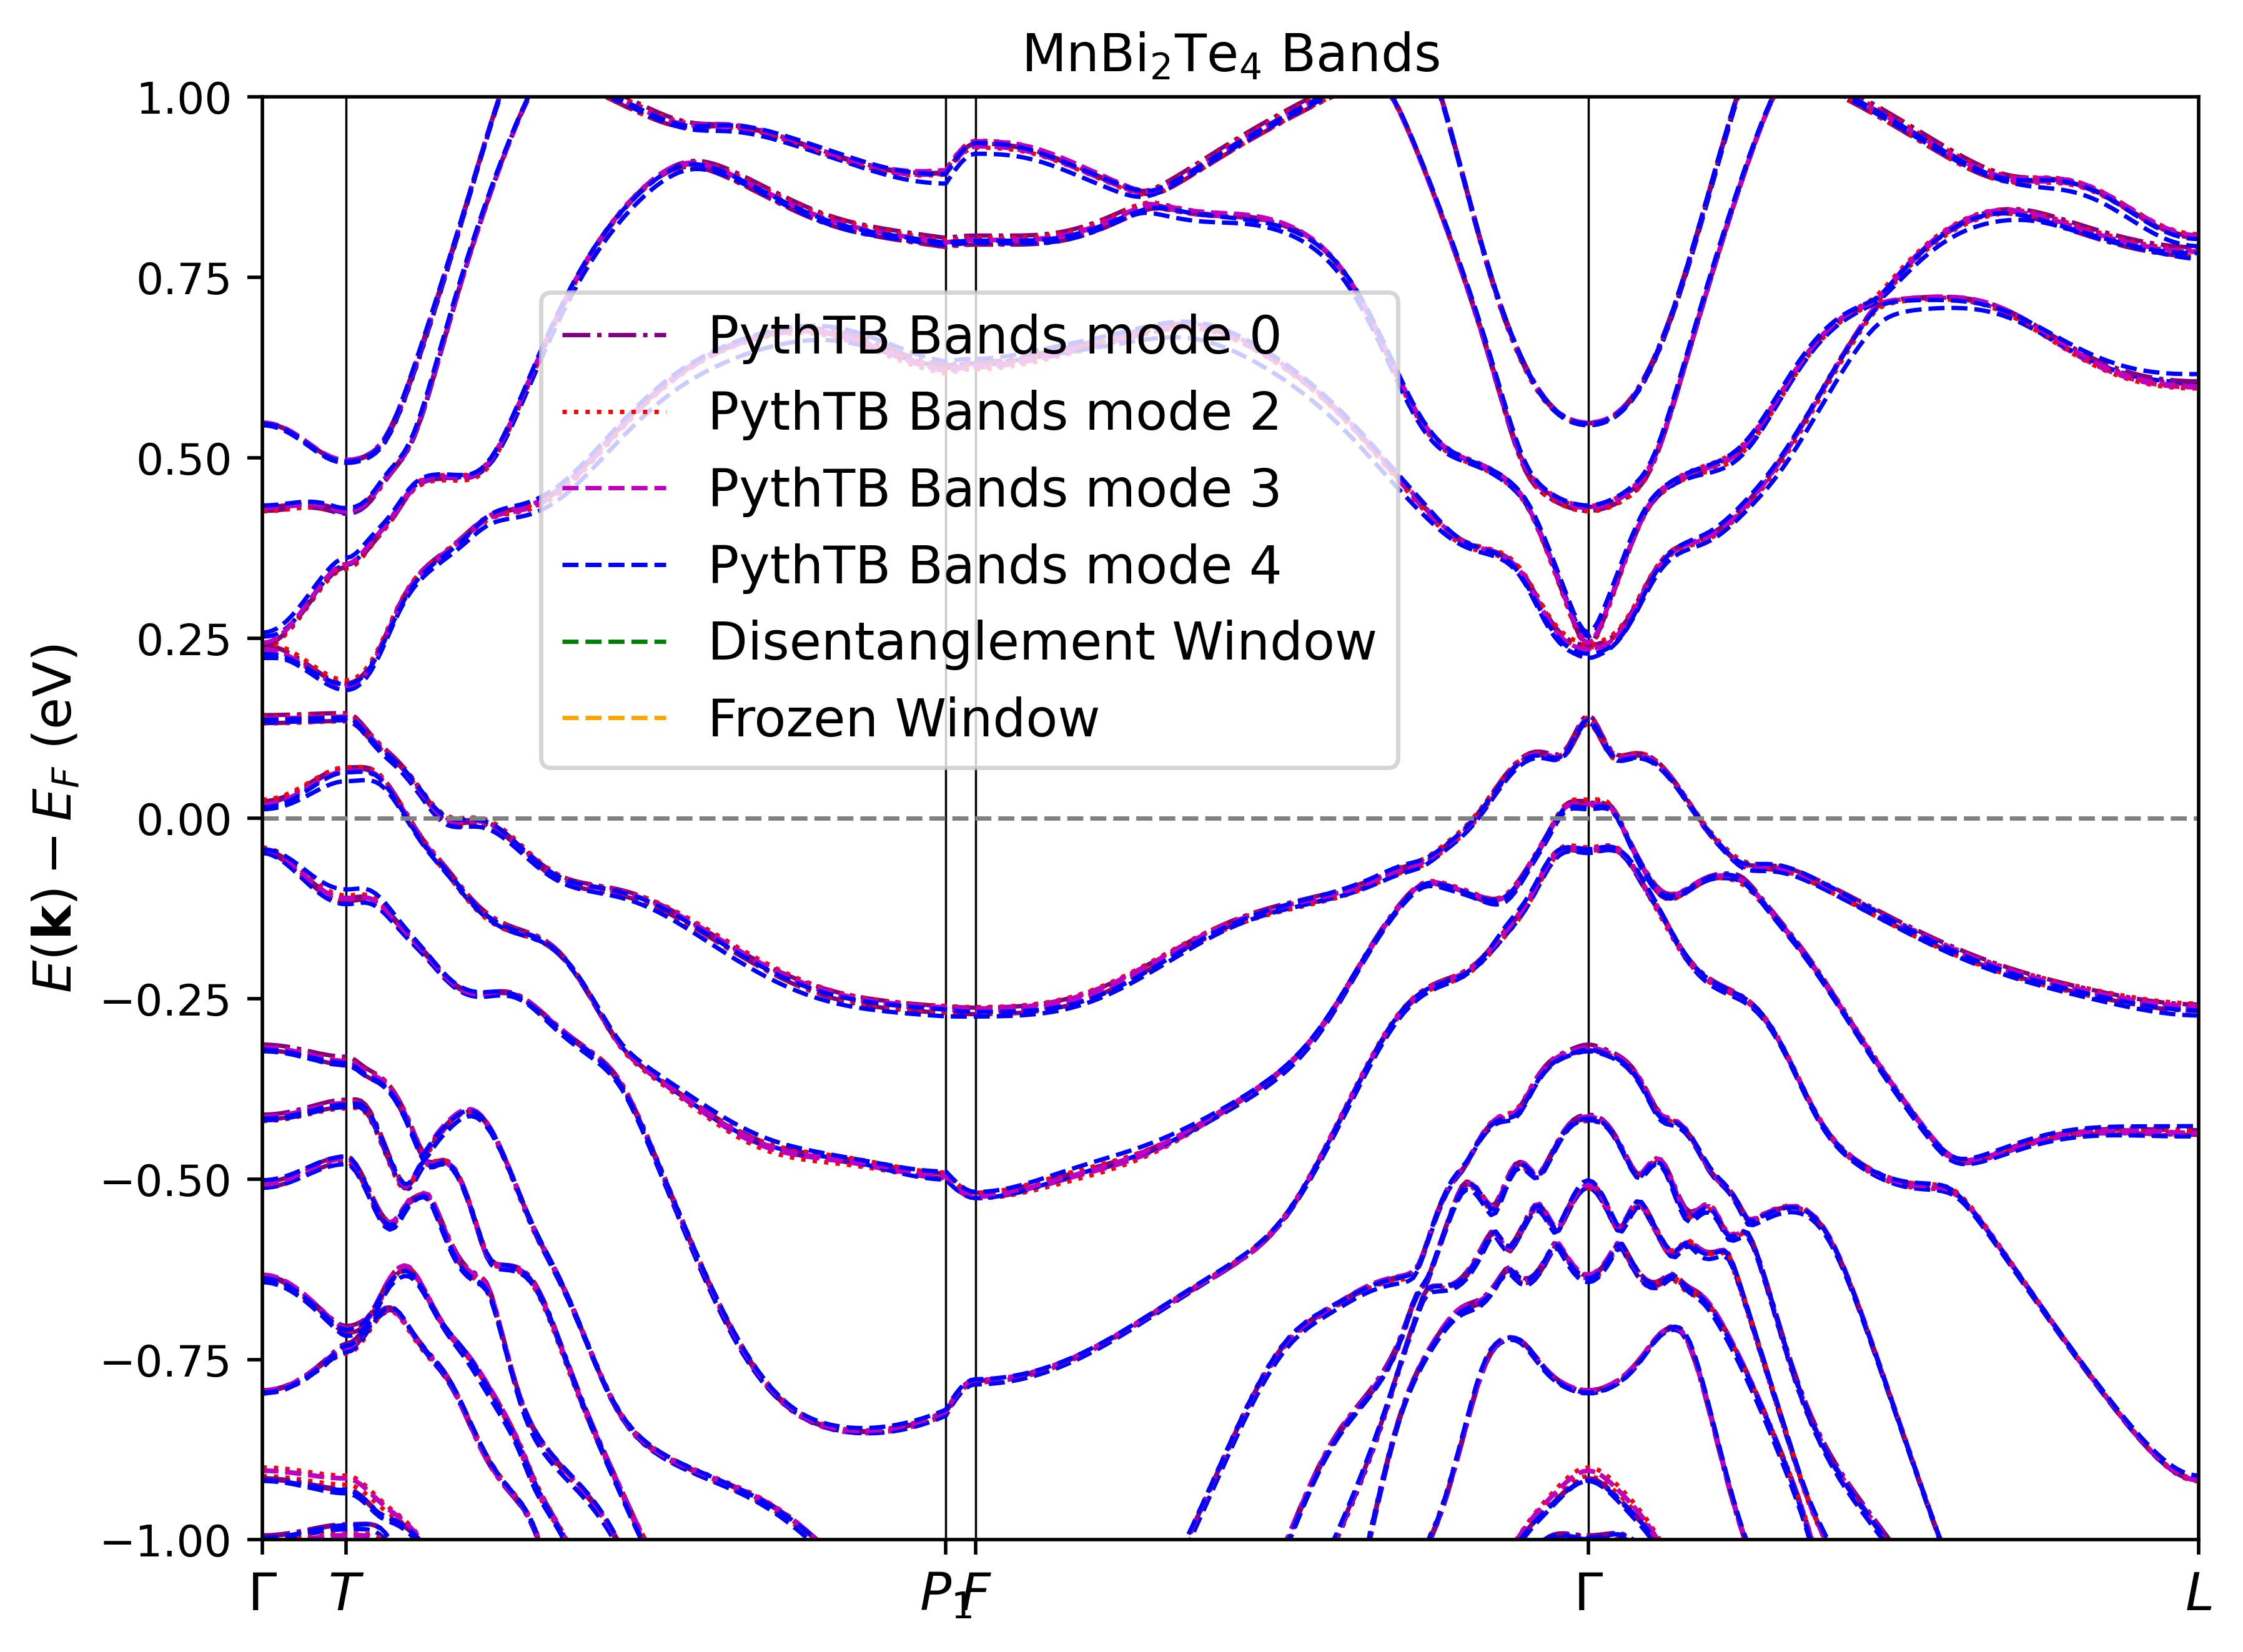

In [13]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=500)

# for i in range(qe_evals.shape[1]):
    # if i == 0:
        # ax.plot(k_dist_qe, qe_evals[:, i] - E_F, c="k", ls="-", label='QE Bands', lw=0.7, zorder=0)
    # else:
        # ax.plot(k_dist_qe, qe_evals[:, i] - E_F, c="k", ls="-", lw=0.7, zorder=0)

for i in range(w90_evals_m0.shape[1]):
    if i == 0:
        ax.plot(k_dist, pythtb_evals_m0[:, i], c="purple", ls="-.", label='PythTB Bands mode 0', lw=1, zorder=2)
        # ax.plot(k_dist_w90_m0, w90_evals_m0_shift[:, i], c="orange", ls="--", label='Wannier90 Bands mode 0',
        ax.plot(k_dist, pythtb_evals_m2[:, i], c="r", ls=":", label='PythTB Bands mode 2', lw=1, zorder=2)
        # ax.plot(k_dist_w90, w90_evals_shift[:, i], c="b", ls="--", label='Wannier90 Bands', lw=1, zorder=1)
        ax.plot(k_dist, pythtb_evals_m3[:, i], c="m", ls="--", label='PythTB Bands mode 3', lw=1, zorder=2)
        # ax.plot(k_dist_w90_m3, w90_evals_m3_shift[:, i], c="r", ls="--", label='Wannier90 Bands mode 3', lw=1, zorder=1)
        ax.plot(k_dist, pythtb_evals_m4[:, i], c="b", ls="--", label='PythTB Bands mode 4', lw=1, zorder=2)
        # ax.plot(k_dist_w90_m4, w90_evals_m4_shift[:, i], c="g", ls="--", label='Wannier90 Bands mode 4', lw=1, zorder=1)
    else:
        ax.plot(k_dist, pythtb_evals_m0[:, i], c="purple", ls="-.", lw=1, zorder=2)
        ax.plot(k_dist, pythtb_evals_m2[:, i], c="r", ls=":", lw=1, zorder=2)
        ax.plot(k_dist, pythtb_evals_m3[:, i], c="m", ls="--", lw=1, zorder=2)
        ax.plot(k_dist, pythtb_evals_m4[:, i], c="b", ls="--", lw=1, zorder=2)


ax.set_xticks(k_node_dist)
for n in range(len(k_node_dist)):
    ax.axvline(x=k_node_dist[n], linewidth=0.5, color="k", zorder=1)
ax.set_xticklabels(k_labels_w90_m0, size=12)

ax.set_ylabel(r"$E(\mathbf{k}) - E_F$ (eV)", size=12)

ax.axhline(0, linestyle='--', color='gray', lw=1)
ax.axhline(outer_window[0]-E_F, linestyle='--', color='g', lw=1, label='Disentanglement Window')
ax.axhline(outer_window[1]-E_F, linestyle='--', color='g', lw=1)
ax.axhline(inner_window[0]-E_F, linestyle='--', color='orange', lw=1, label='Frozen Window')
ax.axhline(inner_window[1]-E_F, linestyle='--', color='orange', lw=1)

ax.set_xlim(k_dist[0], k_dist[-1])
ax.set_ylim(-1, 1)

ax.legend(bbox_to_anchor=(0.6, 0.7),fontsize=12)
ax.set_title(r"MnBi$_2$Te$_4$ Bands")

In [14]:
nk = 20
k_mesh = model_m0.k_uniform_mesh([nk, nk, nk])
d3k = 1/(nk**3)

In [17]:
mode_models = [None, model_m2, model_m3, model_m4]

In [ ]:
n_occ = 58
batch_size = 100

# shape: (mode, k, displacement amp, ...)
H = np.zeros((4, k_mesh.shape[0], 2, model_m0.norb, model_m0.norb), dtype=np.complex128)
# shape: (mode, cartesian dir, k, displacement amp, ...)
v_k = np.zeros((4, 3, k_mesh.shape[0], 2, model_m0.norb, model_m0.norb), dtype=np.complex128)

for i in range(0, len(k_mesh), batch_size):
    print(f"{i} / {len(k_mesh)} k points processed")
    k_batch = k_mesh[i:i+batch_size]

    H_batch = model_m0.hamiltonian(k_batch, flatten_spin_axis=True)
    v_batch = model_m0.velocity(k_batch, flatten_spin_axis=True)

    # all modes share unperturbed H and v
    H[:, i:i+batch_size, 0, :, :] = H_batch[np.newaxis, ...]
    v_k[:, :, i:i+batch_size, 0,:, :] = v_batch[np.newaxis, ...]

for mode_idx, model in enumerate(mode_models):
    if mode_idx  == 0: # not finished
        continue

    for i in range(0, len(k_mesh), batch_size):
        print(f"{i} / {len(k_mesh)} k points processed")
        k_batch = k_mesh[i:i+batch_size]

        H_mode_batch = model.hamiltonian(k_batch, flatten_spin_axis=True)
        v_mode_batch = model.velocity(k_batch, flatten_spin_axis=True)

        H[mode_idx, i:i+batch_size, 1, :, :] = H_mode_batch
        v_k[mode_idx, :, i:i+batch_size, 1, :, :] = v_mode_batch

0 / 8000 k points processed
100 / 8000 k points processed
200 / 8000 k points processed
300 / 8000 k points processed
400 / 8000 k points processed
500 / 8000 k points processed
600 / 8000 k points processed
700 / 8000 k points processed
800 / 8000 k points processed
900 / 8000 k points processed
1000 / 8000 k points processed
1100 / 8000 k points processed
1200 / 8000 k points processed
1300 / 8000 k points processed
1400 / 8000 k points processed
1500 / 8000 k points processed
1600 / 8000 k points processed
1700 / 8000 k points processed
1800 / 8000 k points processed
1900 / 8000 k points processed
2000 / 8000 k points processed
2100 / 8000 k points processed
2200 / 8000 k points processed
2300 / 8000 k points processed
2400 / 8000 k points processed
2500 / 8000 k points processed
2600 / 8000 k points processed
2700 / 8000 k points processed
2800 / 8000 k points processed
2900 / 8000 k points processed
3000 / 8000 k points processed
3100 / 8000 k points processed
3200 / 8000 k points

AttributeError: 'NoneType' object has no attribute 'hamiltonian'

In [ ]:
from pythtb.utils import finite_diff_coeffs, levi_civita

from tensorflow import constant as const
from tensorflow import complex64
import tensorflow as tf
import tensorflow.linalg as tfla

def vel_fd(H_k, mu, dk_mu, order_eps, mode='central'):
    coeffs, stencil = finite_diff_coeffs(order=order_eps, mode=mode)
    print(coeffs)

    fd_sum = np.zeros_like(H_k)

    for s, c in zip(stencil, coeffs):
        fd_sum += c * np.roll(H_k, shift=-s, axis=mu)

    v = fd_sum / (dk_mu)
    return v

def berry_curvature(v_k, H_flat, occ_idxs=None):
   
    # tensorflow optimization
    H_flat_tf = const(H_flat, dtype=complex64)
    v_k_tf = const(v_k, dtype=complex64)

    evals_tf, evecs_tf = tfla.eigh(H_flat_tf)

    # swap for consistent indexing
    evecs_tf = tf.transpose(evecs_tf, perm=[0, 1, 3, 2])  # (n_kpts, n_beta, n_state, n_state)
    evecs_T_tf = tf.transpose(evecs_tf, perm=[0, 1, 3, 2])  # (n_kpts, n_beta, n_state, n_state) 

    evecs_conj_tf = tf.math.conj(evecs_tf)

    # Rotate velocity operators to eigenbasis
    v_k_rot_tf = tf.matmul(
        evecs_conj_tf[None, :, :, :, :],  # (1, n_kpts, n_beta, n_state, n_state)
        tf.matmul(
            v_k_tf,                       # (dim_k, n_kpts, n_beta, n_state, n_state)
            evecs_T_tf[None, :, :, :, :]  # (1, n_kpts, n_beta, n_state, n_state)
        )
    )  # (dim_k, n_kpts, n_beta, n_state, n_state)

    # Identify occupied bands
    n_eigs = evals_tf.shape[-1]
    if occ_idxs is None:
        occ_idxs =  np.arange(n_eigs//2)
    elif occ_idxs == 'all':
        occ_idxs =  np.arange(n_eigs)
    else:
        occ_idxs = np.array(occ_idxs)

    # Identify conduction bands
    cond_idxs = np.setdiff1d(np.arange(n_eigs), occ_idxs)  # Identify conduction bands

    # Compute energy denominators
    delta_E_tf = evals_tf[..., None, :] - evals_tf[..., :, None]
    delta_E_occ_cond_tf = tf.gather(tf.gather(delta_E_tf, occ_idxs, axis=-2), cond_idxs, axis=-1)
    delta_E_cond_occ_tf = tf.gather(tf.gather(delta_E_tf, cond_idxs, axis=-2), occ_idxs, axis=-1)
    inv_delta_E_occ_cond_tf = 1 / delta_E_occ_cond_tf
    inv_delta_E_cond_occ_tf = 1 / delta_E_cond_occ_tf

    v_occ_cond_tf = tf.gather(tf.gather(v_k_rot_tf, occ_idxs, axis=-2), cond_idxs, axis=-1)
    v_cond_occ_tf = tf.gather(tf.gather(v_k_rot_tf, cond_idxs, axis=-2), occ_idxs, axis=-1)
    v_occ_cond_tf = v_occ_cond_tf * inv_delta_E_occ_cond_tf
    v_cond_occ_tf = v_cond_occ_tf * -inv_delta_E_cond_occ_tf

    Q = tf.matmul(v_occ_cond_tf[:, None], v_cond_occ_tf[None, :])
    Q = Q.numpy()

    Omega = 1j * (Q - np.swapaxes(Q, -1, -2).conj())

    return Omega

In [ ]:
v_beta = vel_fd(H, mu=2, dk_mu=0.01, order_eps=1, mode='forward')

In [ ]:
v = np.concatenate((v_k, v_beta[:, np.newaxis, ...]), axis=1)

In [ ]:
b_curv = berry_curvature(v[0], H[0], occ_idxs=range(n_occ))
epsilon = levi_civita(4, 4)
chern2_density = np.einsum("ijkl, ij...mn, kl...nm->...", epsilon, b_curv, b_curv) * (1/(16*np.pi))
chern2_density = chern2_density.reshape((nk, nk, nk, 2))

In [ ]:
plt.imshow(chern2_density[0, :, :, 0].real, cmap='plasma')
plt.colorbar()

In [ ]:
for mode in range(4):
    print("Mode ", mode)
    b_curv = berry_curvature(v[mode], H[mode], occ_idxs=range(n_occ))
    epsilon = levi_civita(4, 4)
    chern2_density = np.einsum("ijkl, ij...mn, kl...nm->...", epsilon, b_curv, b_curv) * (1/(16*np.pi))
    chern2_density = chern2_density.reshape((nk, nk, nk, 2))
    dtheta = np.sum(chern2_density[:-1, :-1, :-1], axis=(0,1,2)) * d3k
    print(dtheta)